In [6]:
# install machine gnostics
# recommended to run in a new virtual environment

# !pip install machinegnostics #<-- Uncomment this line to install the package

# Gnostic SARIMA for Seasonal Time Series

### **Overview**
The **Machine Gnostics SARIMA (Seasonal ARIMA)** takes robust forecasting a step further by explicitly modeling seasonality. Like its non-seasonal counterpart, it uses **Gnostic Weighted Learning** to remain resilient against anomalies, ensuring that seasonal patterns are learned from the consistent majority of the data rather than being distorted by outliers.

The model is defined by:
- **Order (p, d, q)**: Non-seasonal autoregressive, differencing, and moving average terms.
- **Seasonal Order (P, D, Q, s)**: Seasonal AR, seasonal differencing, seasonal MA, and the period $s$.

---

### **Theoretical Background**

The model operates on a doubly differenced series $y''_t$ (after applying seasonal lag $s$ difference $D$ times and regular difference $d$ times):

$$ \Phi_P(L^s) \phi_p(L) y''_t = \Theta_Q(L^s) \theta_q(L) \epsilon_t $$

where weights for the regression are derived from the **Thermodynamic Gnostic Entropy** of the residuals, iteratively refining the coefficients to ignore noise.

***

## Example 1: Modeling Seasonality with Outliers

In this example, we generate data with a strong monthly seasonality (period $s=12$) and a linear trend. We then introduce random outliers to challenge the model.

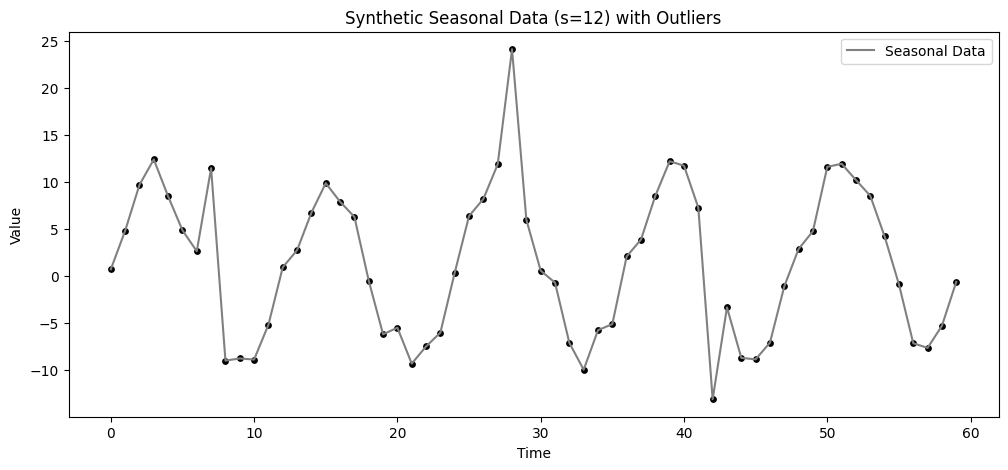

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from machinegnostics.models import SARIMA

def generate_seasonal_data(n_samples=200, period=12, trend=0.05, outlier_prob=0.05):
    """Generate synthetic seasonal data with outliers."""
    np.random.seed(42)
    t = np.arange(n_samples)
    
    # Seasonality: Sine wave
    seasonality = 10 * np.sin(2 * np.pi * t / period)
    
    # Trend
    linear_trend = trend * t
    
    # Noise
    noise = np.random.normal(0, 1.5, n_samples)
    
    y = seasonality + linear_trend + noise
    
    # Add Outliers
    n_outliers = int(n_samples * outlier_prob)
    outlier_idx = np.random.choice(n_samples, n_outliers, replace=False)
    y[outlier_idx] += np.random.choice([-15, 15], n_outliers)
    
    return t, y

# Generate 3 years of monthly data
t, y = generate_seasonal_data(n_samples=60, period=12)

plt.figure(figsize=(12, 5))
plt.plot(t, y, color='gray', label='Seasonal Data')
plt.scatter(t, y, color='black', s=15)
plt.title("Synthetic Seasonal Data (s=12) with Outliers")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

## Train Gnostic SARIMA

We configure the model with:
- `order=(1, 1, 0)`: Standard ARIMA part
- `seasonal_order=(1, 1, 0, 12)`: Seasonal AR(1) with seasonal difference $D=1$ and period $s=12$.
- `trend='c'`: To account for the bias/trend.

In [12]:
# Initialize Gnostic SARIMA
model = SARIMA(
    order=(1, 1, 0),
    seasonal_order=(1, 1, 0, 12),
    trend='ct',
    max_iter=50,
    verbose=False
)

print("Training Gnostic SARIMA...")
model.fit(y)

model.summary()

Training Gnostic SARIMA...
Gnostic SARIMA(p=1, d=1, q=0)x(P=1, D=1, Q=0, s=12)
Trend: 'ct'
Iterations: 18
Final Weights Stats:
  Min: 0.0000
  Max: 0.0982
  Mean: 0.0286


## Forecast Future Seasonality

We predict the next 24 steps (2 full seasons). The model should reproduce the wave pattern.

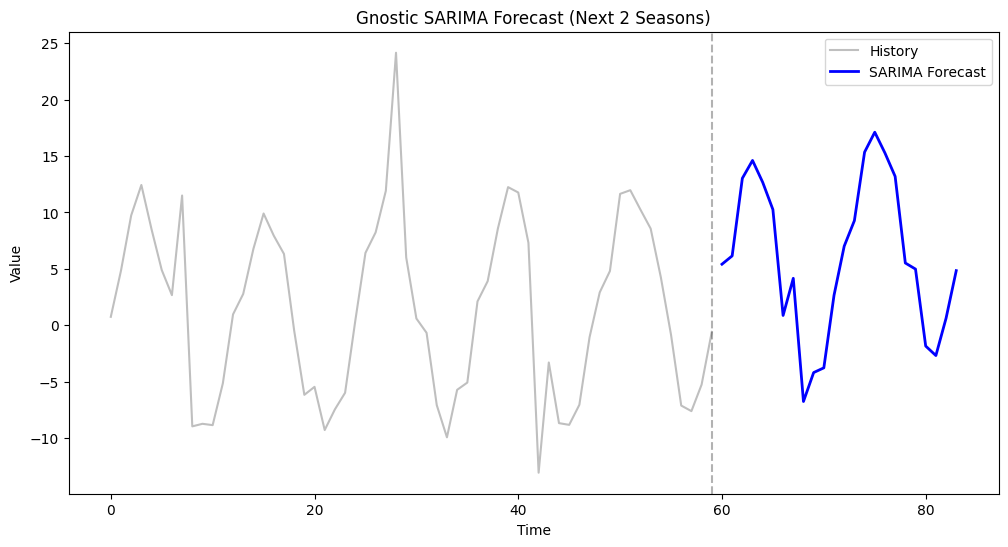

In [13]:
steps = 24
forecast = model.predict(steps=steps)

t_future = np.arange(len(t), len(t) + steps)

plt.figure(figsize=(12, 6))
# Plot history
plt.plot(t, y, color='gray', alpha=0.5, label='History')
# Plot forecast
plt.plot(t_future, forecast, color='blue', linewidth=2, label='SARIMA Forecast')

# Add marker line
plt.axvline(x=t[-1], color='k', linestyle='--', alpha=0.3)

plt.title("Gnostic SARIMA Forecast (Next 2 Seasons)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

## Example 2: Analyzing Seasonal Weights

By inspecting the weights, we can see if the outliers (the spikes that break the seasonal pattern) were correctly identified.

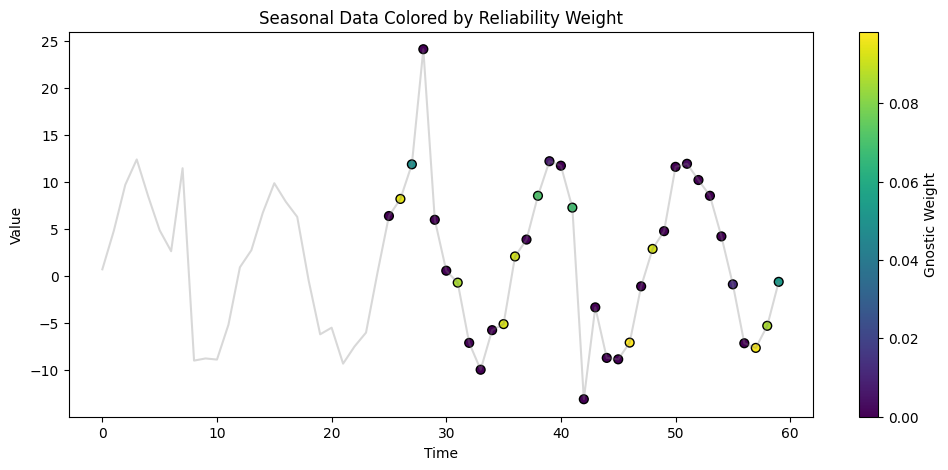

In [14]:
weights = model.weights
# weights are for the fitted portion, which is reduced by D*s and d
valid_start_idx = len(y) - len(weights)
valid_idx = np.arange(valid_start_idx, len(y))

plt.figure(figsize=(12, 5))
plt.plot(t, y, color='gray', alpha=0.3)
sc = plt.scatter(t[valid_idx], y[valid_idx], c=weights, cmap='viridis', s=40, edgecolors='k')
plt.colorbar(sc, label='Gnostic Weight')
plt.title("Seasonal Data Colored by Reliability Weight")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()